In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
import s1 

<ipython-input-21-a378e1d2bb44>:3: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 360*60/ell


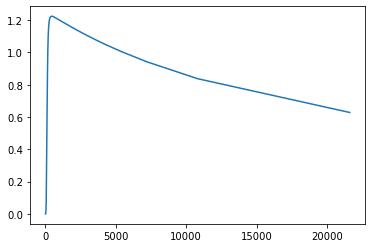

In [21]:
lmax = 5000
ell = np.arange(0,lmax)
ellsc = 360*60/ell
norm = ell * (ell+1) / (2*np.pi)
dl_pwl = ell**2 / (1e9 + ell**4) * 2e8
cl_pwl = dl_pwl
cl_pwl[1:] = dl_pwl[1:]/ norm[1:]
plt.plot (ellsc , dl_pwl)

In [14]:
nside = 512

In [11]:
map_pwl = hp.synfast (cl_pwl , nside)

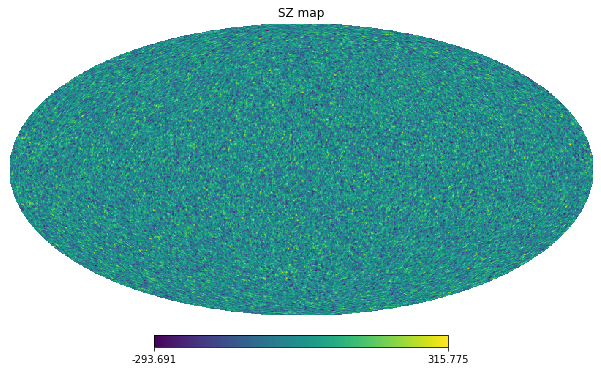

In [12]:
hp.mollview(map_pwl ,title="SZ map")

In [19]:
resol = hp.nside2resol (nside , arcmin = False)
jmax = 10 
theta_bin = 10000

In [22]:
mor_l = s1.morlet_arr (resol, jmax , lmax, theta_bin)
gaus_l = s1.gaus_arr (resol, jmax, lmax, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [23]:
s1_pwl , i1_pwl = s1.compS1 (map_pwl , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'log(S1)')

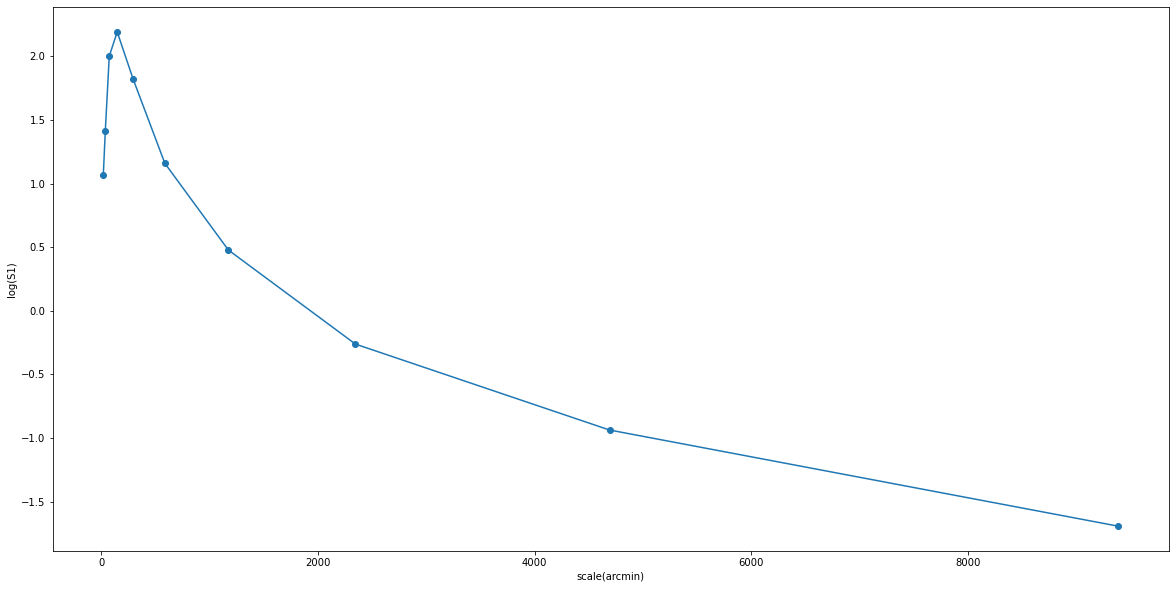

In [25]:
Jf=np.arange(jmax)
res_arcmin = hp.nside2resol(nside, arcmin=True)
scale=2**Jf*((2*res_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_pwl),'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 

In [26]:
cl_pwl_out = hp.anafast(map_pwl)

In [27]:
map_pwl_out = hp.synfast(cl_pwl_out , nside)

In [ ]:
s1_pwl_out , i1_pwl_out = s1.compS1 (map_pwl_out , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8


In [ ]:
Jf=np.arange(jmax)
res_arcmin = hp.nside2resol(nside, arcmin=True)
scale=2**Jf*((2*res_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_pwl),'o-')
plt.plot (scale,np.log(s1_pwl_out),'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 